In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#sns.set_style('whitegrid')
#plt.style.use('fivethirtyeight')

In [2]:
import ipywidgets as widgets
from ipywidgets import interact,interactive,fixed,interact_manual

def scroll(df,nr=7,nc=7):
    def peek(row=0,col=0):
        return df.iloc[row:row+nr,col:col+nc]
    if len(df.columns) <= nc :
        interact(peek,
                row=(0,len(df)-nr,nr),
                col=fixed(0))
    else :
        interact(peek,
                row=(0,len(df)-nr,nr),
                col=(0,len(df.columns),nc))

In [3]:
data = sns.load_dataset('tips')
scroll(data)

interactive(children=(IntSlider(value=0, description='row', max=237, step=7), Output()), _dom_classes=('widget…

TypeError: Neither the `x` nor `y` variable appears to be numeric.

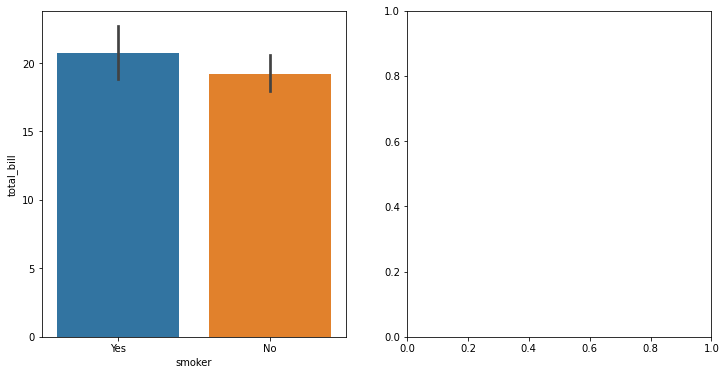

In [4]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
sns.barplot(x='smoker',y='total_bill',data=data,ax=ax[0])
#sns.barplot(x='smoker',y='tip',data=data,ax=ax[1])
sns.barplot(x='smoker',y='day',data=data,ax=ax[0])
#sns.barplot(x='smoker',y='day',data=data,ax=ax[3])
plt.tight_layout();

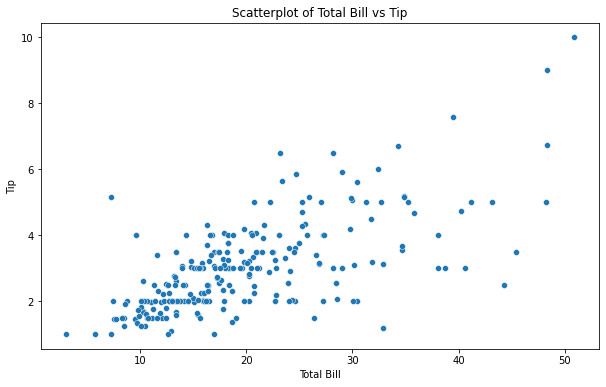

In [5]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='total_bill', y='tip', data=data)
plt.title('Scatterplot of Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

In [6]:
data_corr = data.corr()
data_corr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


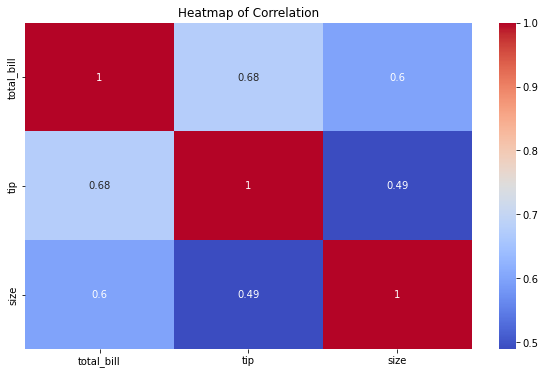

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(data_corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation')
plt.show()

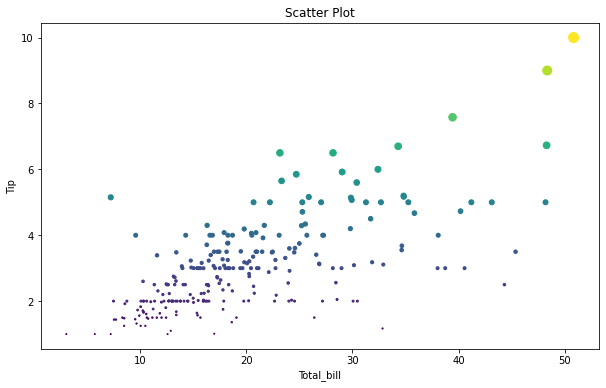

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(data['total_bill'],data['tip'],s = np.array(data['tip'])**2,c=data['tip'],alpha=1)
plt.title('Scatter Plot')
plt.xlabel('Total_bill')
plt.ylabel('Tip');

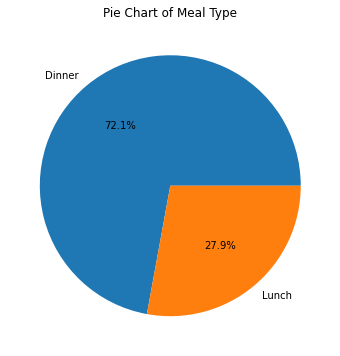

In [9]:
meal_counts = data['time'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(meal_counts, labels=meal_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of Meal Type')
plt.show()

Through the graph, we can see that 72% of the invoices were for dinner meals, while 27.9% were for lunch meals.

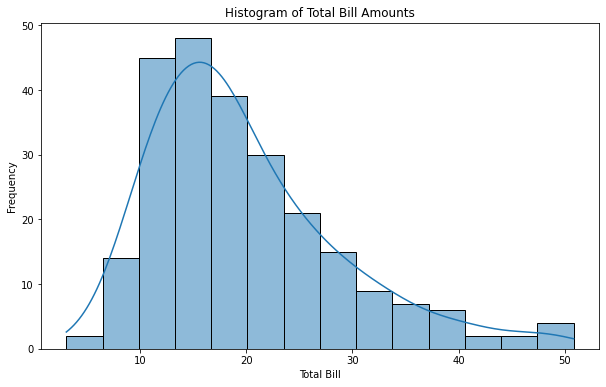

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(data['total_bill'], kde=True)
plt.title('Histogram of Total Bill Amounts')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.show()

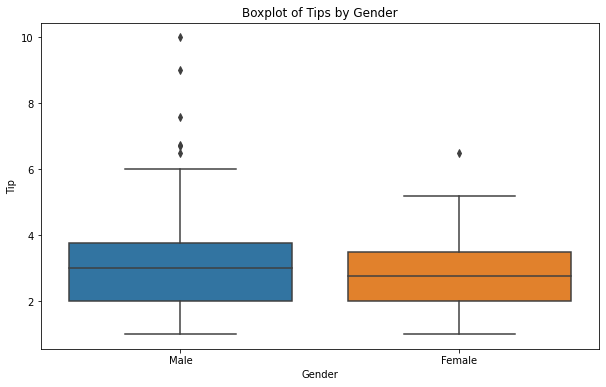

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x='sex', y='tip', data=data)
plt.title('Boxplot of Tips by Gender')
plt.xlabel('Gender')
plt.ylabel('Tip')
plt.show()

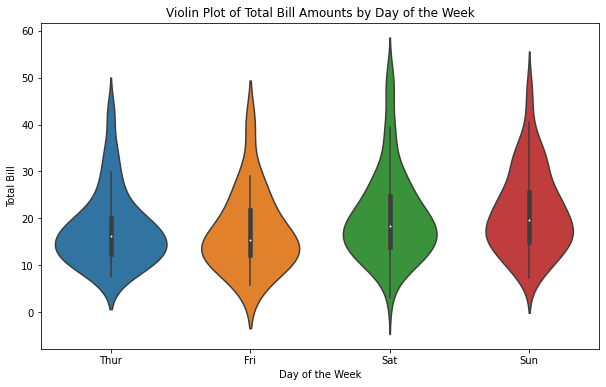

In [12]:
plt.figure(figsize=(10,6))
sns.violinplot(x='day', y='total_bill', data=data)
plt.title('Violin Plot of Total Bill Amounts by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Bill')
plt.show()

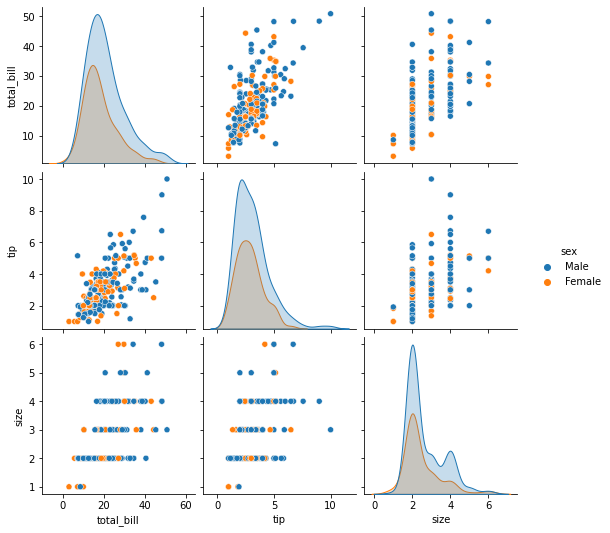

In [13]:
sns.pairplot(data, hue='sex')
plt.show()

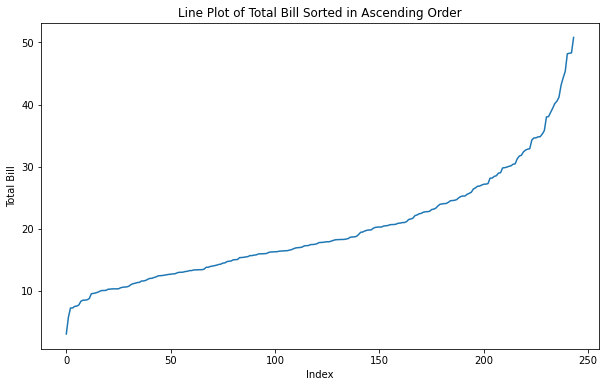

In [14]:
plt.figure(figsize=(10,6))
sns.lineplot(x=range(len(data)), y=data['total_bill'].sort_values())
plt.title('Line Plot of Total Bill Sorted in Ascending Order')
plt.xlabel('Index')
plt.ylabel('Total Bill')
plt.show()

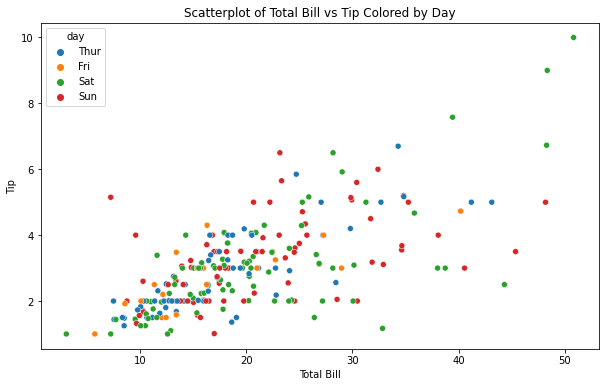

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='total_bill', y='tip', hue='day', data=data)
plt.title('Scatterplot of Total Bill vs Tip Colored by Day')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

In [16]:
data['Total'] = data['total_bill'] + data['tip']
data.head(3)

,total_bill,tip,sex,smoker,day,time,size,Total
0,16.99,1.01,Female,No,Sun,Dinner,2,18.00
1,10.34,1.66,Male,No,Sun,Dinner,3,12.00
2,21.01,3.50,Male,No,Sun,Dinner,3,24.51


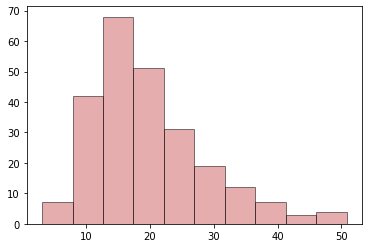

In [17]:
plt.hist(data['total_bill'],edgecolor='black',color='indianred',alpha=.5);

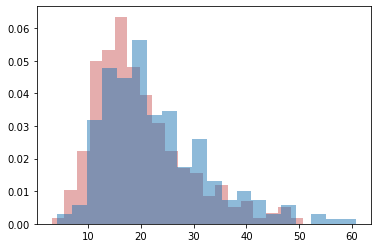

In [18]:
plt.hist(data['total_bill'],density=True,color='indianred',bins=20,alpha=.5)
plt.hist(data['Total'],density=True,alpha=.5,bins=20);

/Users/mu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


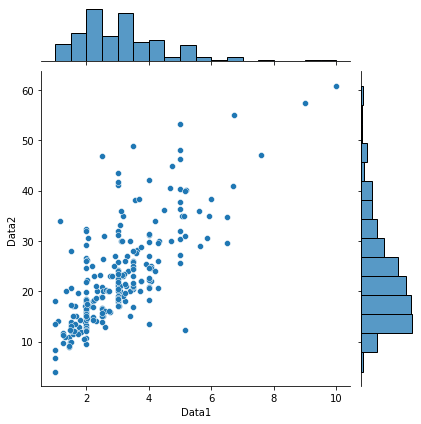

In [19]:
p=sns.jointplot(data['tip'],data['Total'])
p.set_axis_labels("Data1", "Data2")

/Users/mu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


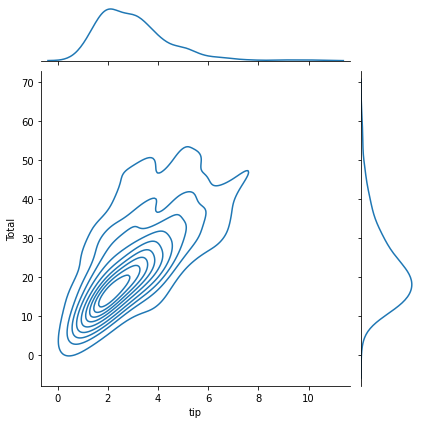

In [20]:
sns.jointplot(data['tip'],data['Total'],kind='kde');

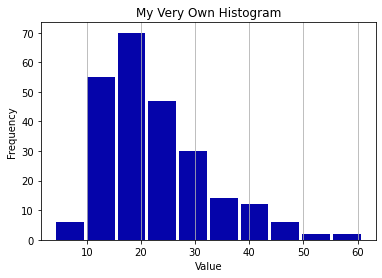

In [21]:
plt.hist(data['Total'],bins=10,color='#0504aa',rwidth=.9)
plt.grid(axis='x')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')
plt.savefig("hist.jpeg",transparent=True);

/Users/mu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tip', ylabel='Density'>

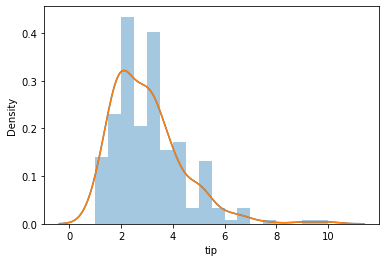

In [22]:
sns.distplot(data['tip'])
sns.kdeplot(data['tip'])

<AxesSubplot:xlabel='tip', ylabel='Density'>

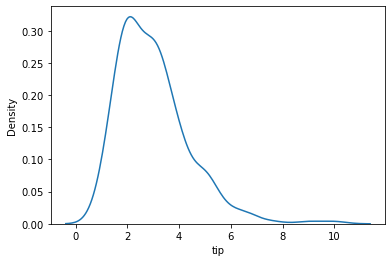

In [23]:
sns.kdeplot(data['tip'])

In [24]:
import numpy as np
data1 = np.random.randn(1000,)
data1

array([-3.63378613e-01, -1.35012257e+00, -2.20022892e-01,  5.64049626e-01,
        1.02846884e+00, -1.75093920e-01, -1.08655521e-01,  4.26636337e-01,
        3.22293175e-01,  8.07638950e-02,  1.39226734e+00, -9.66145970e-01,
       -4.50819311e-01,  7.86680042e-01,  9.65926380e-02,  1.05156383e+00,
       -1.43886228e-01,  5.11011235e-02, -4.95722253e-01, -6.30439844e-01,
       -2.04628543e-01,  3.96169303e-01,  4.62123080e-01,  1.00686229e+00,
        9.95909449e-01,  4.28424517e-01,  1.59389084e+00,  3.57034787e-02,
        6.56708406e-01,  5.86778768e-01, -7.55691211e-01, -1.53120950e+00,
       -9.65889899e-02, -2.92893590e-01, -1.36970639e+00,  6.04415147e-01,
        6.15108560e-01, -2.94084526e-01, -5.18597896e-01,  1.63167261e+00,
        5.58361749e-01, -1.66677015e+00,  1.47497184e-01, -1.78200946e+00,
        1.77411384e-01,  3.83418919e-02, -1.71664088e+00, -1.00097113e+00,
        3.14804647e-01, -1.48368194e-01,  7.73529787e-01,  4.48953817e-01,
        5.23929009e-01, -

/Users/mu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/mu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.0 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/mu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/mu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: Futur

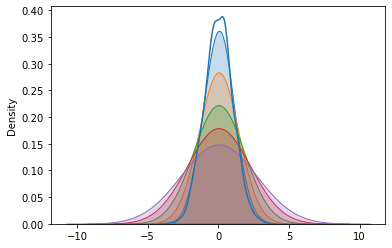

In [25]:
sns.kdeplot(data1)
for i in np.arange(.5,3,.5):
    sns.kdeplot(data1,bw=i,label=i,shade=True)

/Users/mu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


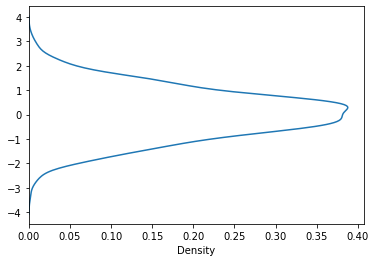

In [26]:
sns.kdeplot(data1,vertical=True);

<AxesSubplot:ylabel='Density'>

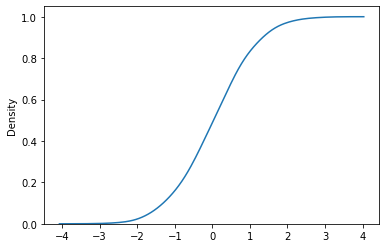

In [27]:
sns.kdeplot(data1,cumulative=True)

In [34]:
np.random.seed(0)

samples = 100
x = np.linspace(-10,10,samples)

noise = np.random.normal(0,3,samples)

y = 2* x+3+noise

df = pd.DataFrame({'x':x,'y':y})
df

,x,y
0,-10.000000,-11.707843
1,-9.797980,-15.395488
2,-9.595960,-13.255705
3,-9.393939,-9.065199
4,-9.191919,-9.781164
...,...,...
95,9.191919,23.503558
96,9.393939,21.819379
97,9.595960,27.549531
98,9.797980,22.976696


y = 2 * x + 3 + noise

Text(0, 0.5, 'y')

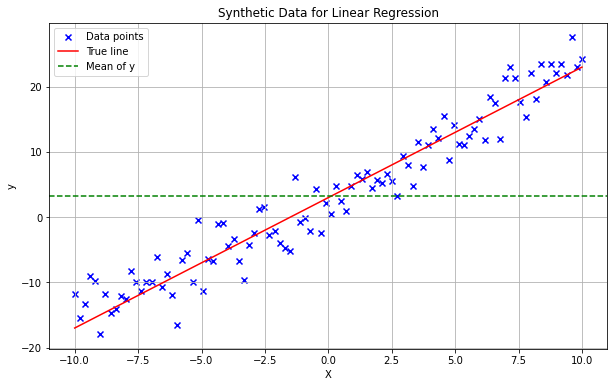

In [45]:
plt.figure(figsize=(10,6))
plt.scatter(df['x'],df['y'],color='blue',label='Data points',marker='x')
plt.plot(df['x'],2*df['x']+3,color='r',label='True line')
plt.axhline(df['y'].mean(), color='green', linestyle='--', label='Mean of y')
plt.legend()
plt.grid(True)
plt.title('Synthetic Data for Linear Regression')
plt.xlabel('X')
plt.ylabel('y')

In [46]:
df['y_pred_true'] = 2*x+3
df

,x,y,y_pred_true
0,-10.000000,-11.707843,-17.000000
1,-9.797980,-15.395488,-16.595960
2,-9.595960,-13.255705,-16.191919
3,-9.393939,-9.065199,-15.787879
4,-9.191919,-9.781164,-15.383838
...,...,...,...
95,9.191919,23.503558,21.383838
96,9.393939,21.819379,21.787879
97,9.595960,27.549531,22.191919
98,9.797980,22.976696,22.595960


Text(0, 0.5, 'y')

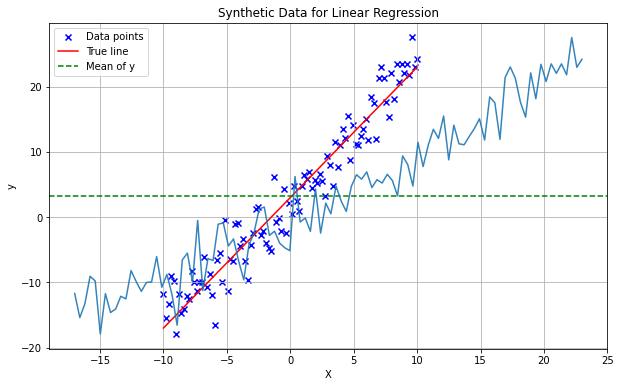

In [54]:
plt.figure(figsize=(10,6))
plt.scatter(df['x'],df['y'],color='blue',label='Data points',marker='x')
plt.plot(df['x'],2*df['x']+3,color='r',label='True line')
plt.axhline(df['y'].mean(), color='green', linestyle='--', label='Mean of y')
plt.plot(df['x'],df['y'],alpha=.9)
plt.legend()
plt.grid(True)
plt.title('Synthetic Data for Linear Regression')
plt.xlabel('X')
plt.ylabel('y')